In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import KFold, cross_val_score

In [7]:
'''
    1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется
    предсказать возраст ракушки (число колец) по физическим измерениям.
'''

df = pd.read_csv('abalone.csv')
df.head(1)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [18]:
'''
    2.Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0,
    M — в 1. Если вы используете Pandas, то подойдет следующий код: 
    data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
'''

df['Sex'] = df['Sex'].map(lambda x : 1 if x == 'M' else (-1 if x == 'F' else 0))

In [21]:
'''
    3. Разделите содержимое файлов на признаки и целевую переменную. В последнем 
    столбце записана целевая переменная, в остальных — признаки.
'''

X = df.loc[:,'Sex':'ShellWeight']
y = df['Rings']

In [58]:
'''
    4.Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным 
    числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе).
    Для каждого из вариантов оцените качество работы полученного леса на 
    кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" 
    при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве
    меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
'''

kf = KFold(n=y.size,n_folds=2,random_state=1,shuffle=True)

scores = [0.0]
for i in range(1,51):
    model = RandomForestRegressor(n_estimators=i,random_state=1)
    score = np.mean(cross_val_score(model, X.values, y.values, cv=kf, scoring='r2'))
    scores.append(score)


In [62]:
'''
    5. Определите, при каком минимальном количестве деревьев случайный лес показывает
    качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.
'''


for n,i in enumerate(scores):
    if i >= 0.52:
        print(n)
        break

25


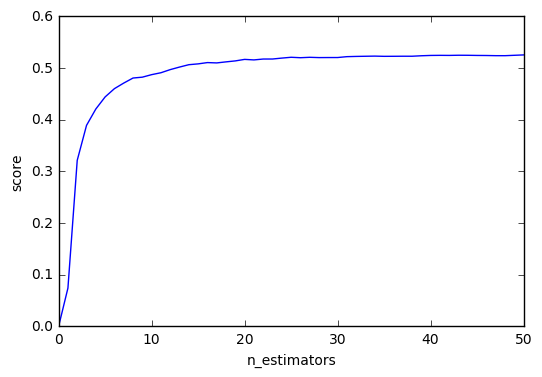

In [66]:
'''
    6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?
'''

plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()